In [275]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from geopy.distance import geodesic
import time


In [276]:
df=pd.read_csv('nyc_taxi_trip_duration Dataset.csv')

In [277]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [278]:
df.shape

(729322, 11)

In [279]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

# Checking missing or null values

In [280]:
df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [281]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
#Calculate and assign new columns to the dataframe such as weekday,
#month and pickup_hour which will help us to gain more insights from the data.
df['weekday'] = df.pickup_datetime.dt.weekday
df['month'] = df.pickup_datetime.dt.month
df['weekday_num'] = df.pickup_datetime.dt.weekday
df['pickup_hour'] = df.pickup_datetime.dt.hour
df['dropoff_hour']=df.dropoff_datetime.dt.hour

In [282]:
df['trip_duration_hour'] = df['trip_duration'].apply(lambda x: x/3600)
df['store_and_fwd_flag']=1*(df.store_and_fwd_flag.values=='Y')

In [283]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag             int32
trip_duration                  int64
weekday                        int64
month                          int64
weekday_num                    int64
pickup_hour                    int64
dropoff_hour                   int64
trip_duration_hour           float64
dtype: object

In [284]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,month,weekday_num,pickup_hour,dropoff_hour,trip_duration_hour
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05,729322.000000,729322.000000,729322.000000,729322.000000,729322.00000,729322.000000
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,0.005539,9.522291e+02,3.049081,3.518410,3.049081,13.611698,13.60616,0.264508
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,0.074221,3.864626e+03,1.954470,1.680661,1.954470,6.402853,6.48637,1.073507
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,0.000000,1.000000e+00,0.000000,1.000000,0.000000,0.000000,0.00000,0.000278
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,0.000000,3.970000e+02,1.000000,2.000000,1.000000,9.000000,9.00000,0.110278
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,0.000000,6.630000e+02,3.000000,4.000000,3.000000,14.000000,14.00000,0.184167
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,0.000000,1.075000e+03,5.000000,5.000000,5.000000,19.000000,19.00000,0.298611
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.000000,1.939736e+06,6.000000,6.000000,6.000000,23.000000,23.00000,538.815556


# Checking for outliers:
From df.describe(), we can see,
possible outliers present in:
passenger_count, trip_duration
Let us plot and check for the outliers and if they are present, we will remove it

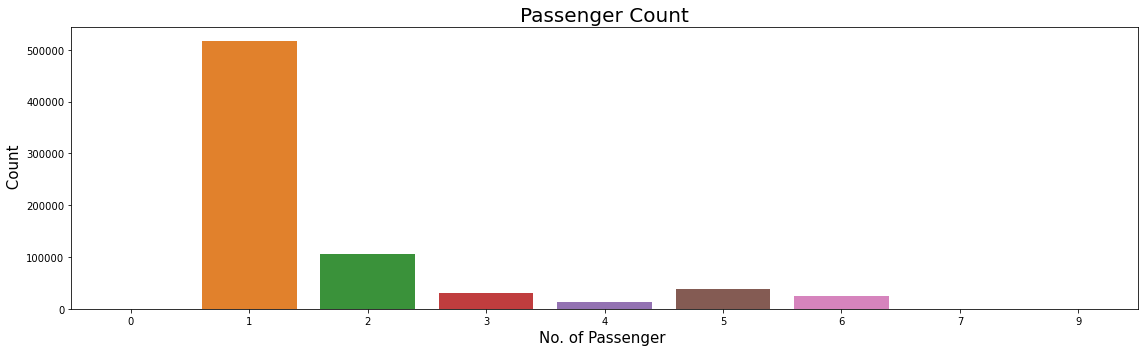

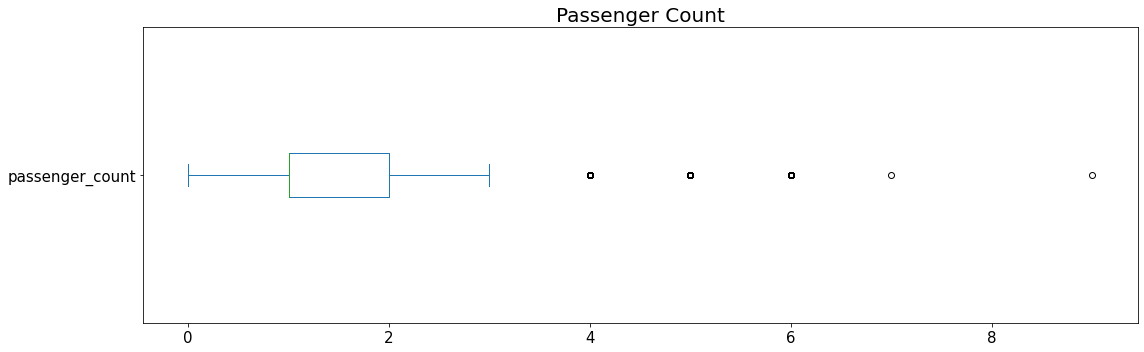

In [285]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(16,5))
# line = df['passenger_count'].value_counts().plot(kind='bar',fontsize = 15)
line = sns.countplot(df.passenger_count)
line.set_ylabel(" Count",fontsize = 15)
line.set_xlabel("No. of Passenger ",fontsize = 15)
line.set_title('Passenger Count',fontsize = 20)
fig.tight_layout()
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(16,5))
box = df['passenger_count'].plot(kind='box',vert = False,fontsize = 15)
box.set_title('Passenger Count',fontsize = 20)

fig.tight_layout()

There are some trips with 0 passenger count.
Few trips consisted of even 4,5,6, 7, 8 or 9 passengers. Clear outliers and pointers to data inconsistency
Most of trip consist of passenger either 1 or 2

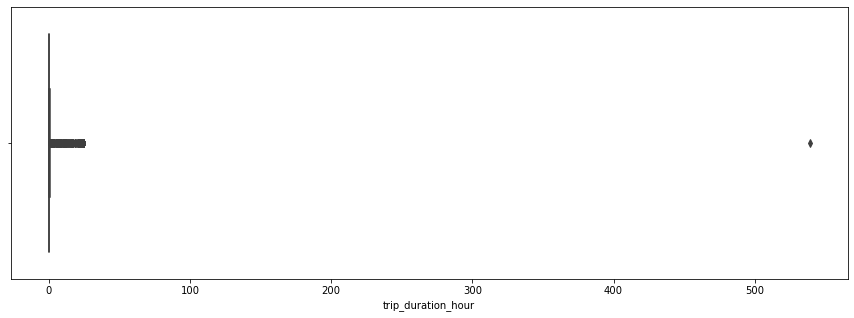

In [286]:
plt.figure(figsize = (15,5))
sns.boxplot(df.trip_duration_hour)
plt.show()

In [289]:
#calculating distance
from geopy.distance import great_circle

df['distance'] = df.apply(lambda x: great_circle([x.pickup_latitude, x.pickup_longitude], [x.dropoff_latitude, x.dropoff_longitude]).km, axis=1)
    

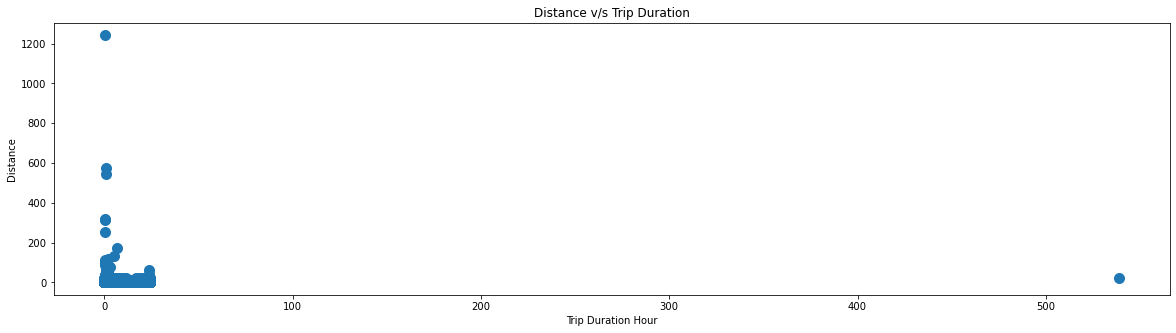

In [17]:
plt.figure(figsize = (20,5))
plt.scatter(df.trip_duration_hour, df.distance , s=100, alpha=1)
plt.ylabel('Distance')
plt.xlabel('Trip Duration Hour')
plt.title('Distance v/s Trip Duration')
plt.show()

Trip duration is 0 hrs but has large distance covered. Also, trips with large trip duration, but for 0kms. They need to 
be removed

# Defining outliers

In [290]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [291]:
out_iqr(df , 'distance')

The IQR is 2.6437898020697164
The lower bound value is -2.7329879285750383
The upper bound value is 7.842171279703827
Total number of outliers are 70318


In [292]:
df=df[df['distance']>lower]
df=df[df['distance']<upper]

In [293]:
df.shape

(659004, 18)

In [294]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [295]:
out_iqr(df , 'trip_duration_hour')

The IQR is 0.1552777777777778
The lower bound value is -0.12930555555555556
The upper bound value is 0.4918055555555556
Total number of outliers are 20162


In [296]:
df=df[df['trip_duration_hour']>0]
df=df[df['trip_duration_hour']<upper]

In [297]:
df.shape

(638842, 18)

In [298]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [299]:
out_iqr(df , 'passenger_count')

The IQR is 1.0
The lower bound value is -0.5
The upper bound value is 3.5
Total number of outliers are 67118


In [300]:
df=df[df['passenger_count']>0]
df=df[df['passenger_count']<upper]

In [301]:
df.shape

(571695, 18)

<AxesSubplot:>

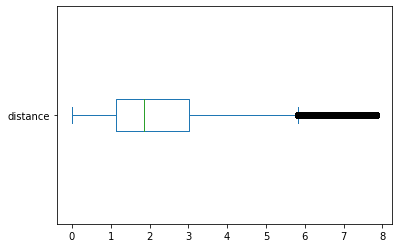

In [302]:
df.distance.plot(kind='box',vert=False,fontsize=10)

<AxesSubplot:>

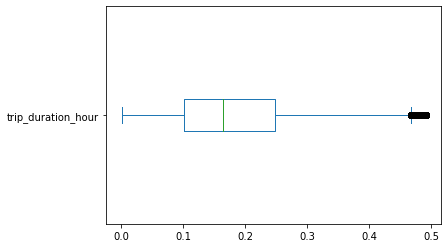

In [303]:
df.trip_duration_hour.plot(kind='box',vert=False,fontsize=10)

<AxesSubplot:>

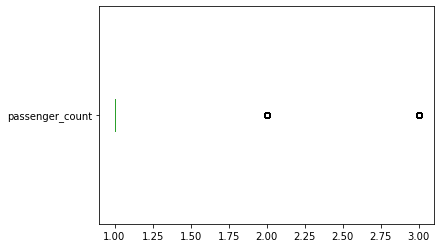

In [304]:
df['passenger_count'].plot(kind='box',vert=False,fontsize=10)

# After removing the outliers, we can see the number of rows have reduced

In [305]:
df['trip_duration_hour'].mean()

0.18340000155483976

# Benchmark Model
# I have used Root Mean Square Error (RMSE) over Mean Squared Error to bring the error difference in the same unit

In [306]:
from sklearn.utils import shuffle
# Shuffling the Dataset
df = shuffle(df, random_state = 42)
#creating 4 divisions
div = int(df.shape[0]/4)
# 3 parts to train set and 1 part to test set
train = df.loc[:3*div+1,:]
test = df.loc[3*div+1:]

In [307]:
train.shape

(368884, 18)

In [308]:
test.shape

(202812, 18)

In [309]:
import warnings
warnings.filterwarnings('ignore')

In [310]:
# storing simple mean in a new column in the test set as "simple_mean"
test['simple_mean'] = train['trip_duration_hour'].mean()

In [311]:
#calculating root mean square error
from sklearn.metrics import mean_squared_error as MSE
simple_mean_error = np.sqrt(MSE(test['trip_duration_hour'] , test['simple_mean']))
simple_mean_error

0.1047293626440531

# The RMSE for trip duration hour is 0.1047293626440531

In [312]:
vendor=pd.pivot_table(train,values='trip_duration_hour',index=['vendor_id'],aggfunc=np.mean)
vendor

,trip_duration_hour
vendor_id,
1,0.182524
2,0.183927


In [313]:
# initializing new column to zero
test['vendorid_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in train['vendor_id'].unique():
  # Assign the mean value corresponding to unique entry
  test['vendorid_mean'][test['vendor_id'] == str(i)] = train['trip_duration_hour'][train['vendor_id'] == str(i)].mean()

In [314]:
#calculating root mean square error
vendor_error = np.sqrt(MSE(test['trip_duration_hour'] , test['vendorid_mean'] ))
vendor_error

0.21149797426310965

In [315]:
passenger_type = pd.pivot_table(train, values='trip_duration_hour', index = ['passenger_count'], aggfunc=np.mean)
passenger_type

,trip_duration_hour
passenger_count,
1,0.182108
2,0.187481
3,0.187615


In [316]:
# initializing new column to zero
test['passenger_count_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in train['passenger_count'].unique():
  # Assign the mean value corresponding to unique entry
  test['passenger_count_mean'][test['passenger_count'] == str(i)] = train['trip_duration_hour'][train['passenger_count'] == str(i)].mean()

In [317]:
#calculating root mean square error
passenger_type_error = np.sqrt(MSE(test['trip_duration_hour'] , test['passenger_count_mean'] ))
passenger_type_error

0.21149797426310965

In [318]:
#both vendor id and passenger count and its trip duration hour
combo = pd.pivot_table(train, values = 'trip_duration_hour', index = ['vendor_id','passenger_count'], aggfunc = np.mean)
combo

trip_duration_hour
vendor_id passenger_count                    
1         1                          0.180270
          2                          0.193511
          3                          0.195265
2         1                          0.184235
          2                          0.182942
          3                          0.183040

In [319]:
# Initiating new empty column
test['Super_mean'] = 0

# Assigning variables to strings ( to shorten code length)
s2 = 'passenger_count'
s1 = 'vendor_id'

# For every Unique Value in s1
for i in test[s1].unique():
  # For every Unique Value in s2
  for j in test[s2].unique():
    # Calculate and Assign mean to new column, corresponding to both unique values of s1 and s2 simultaneously
    test['Super_mean'][(test[s1] == i) & (test[s2]==str(j))] = train['trip_duration_hour'][(train[s1] == i) & (train[s2]==str(j))].mean()

In [320]:
#calculating mean absolute error
super_mean_error = np.sqrt(MSE(test['trip_duration_hour'] , test['Super_mean'] ))
super_mean_error

0.21149797426310965

# The RMSE for vendor id and passenger count is 0.21149797426310965
